In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit, minimize, root
from scipy.misc import derivative
from sympy import *

# 1 Leer los archivos

In [8]:
dataf = pd.read_csv("file_f.csv")
datag = pd.read_csv("file_g.csv")

#El archivo tiene una columna extra que indica el índice de la fila, hay que quitarlo

dataf=dataf.drop(dataf.columns[[0]],axis=1)
datag=datag.drop(datag.columns[[0]],axis=1)

In [9]:
dataf

,x,y
0,-2.000000,-10.561835
1,-1.939394,-8.231853
2,-1.878788,-9.534953
3,-1.818182,-9.241336
4,-1.757576,-10.319815
...,...,...
95,3.757576,35.020698
96,3.818182,34.630118
97,3.878788,37.781872
98,3.939394,41.869477


In [10]:
datag

,x,y
0,-2.000000,43.800852
1,-1.939394,42.049952
2,-1.878788,38.473135
3,-1.818182,36.070861
4,-1.757576,34.152866
...,...,...
95,3.757576,-0.631521
96,3.818182,0.543448
97,3.878788,-1.618117
98,3.939394,-1.229334


In [15]:
#Vamos a renombrar las variables
x_f,y_f = dataf['x'],dataf['y']
x_g,y_g = datag['x'],datag['y']


# Vamos a graficar la distribución de ambos datasets
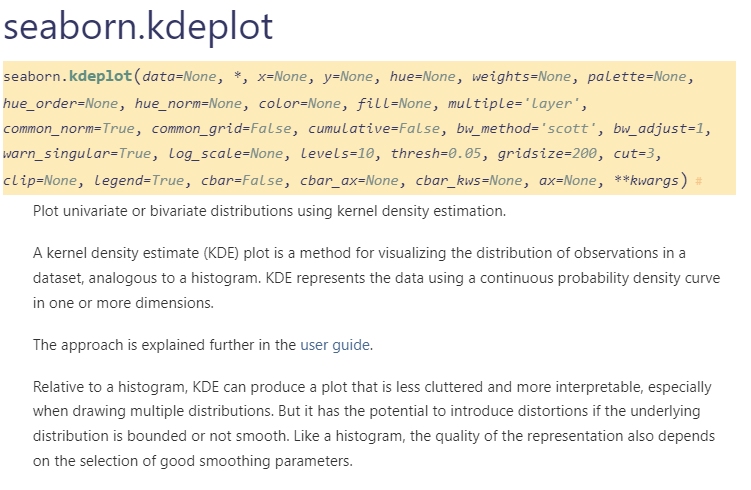

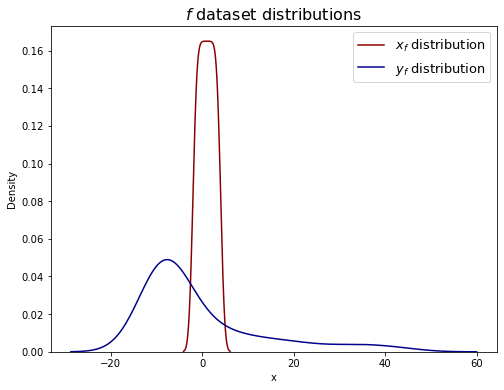

In [47]:
plt.figure(figsize=(8,6))
sns.kdeplot(x_f,color='darkred',label='$x_f$ distribution')
sns.kdeplot(y_f,color='darkblue',label='$y_f$ distribution')
plt.title('$f$ dataset distributions', size=16)
plt.legend(fontsize=13)

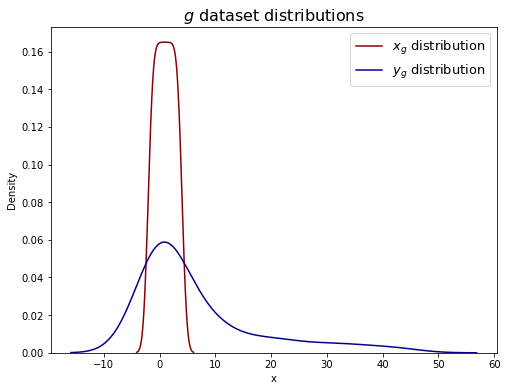

In [48]:
plt.figure(figsize=(8,6))
sns.kdeplot(x_g,color='darkred',label='$x_g$ distribution')
sns.kdeplot(y_g,color='darkblue',label='$y_g$ distribution')
plt.title('$g$ dataset distributions', size=16)
plt.legend(fontsize=13)

# Ahora graficamos los conjuntos

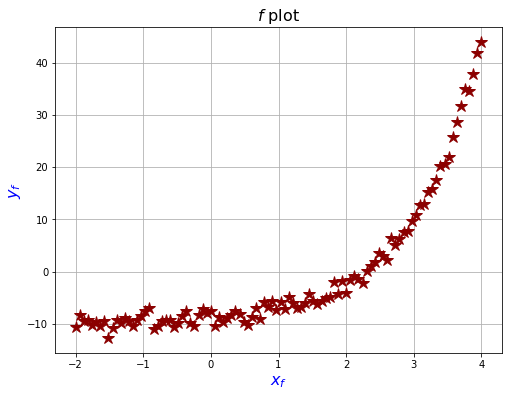

In [65]:
plt.figure(figsize=(8,6))
plt.plot(x_f,y_f,'*',markersize=12, color='darkred')
plt.title('$f$ plot', size=16)
plt.xlabel('$x_f$', size=16, color='blue')
plt.ylabel('$y_f$', size=16, color='blue')
plt.grid()
#plt.legend(fontsize=13)

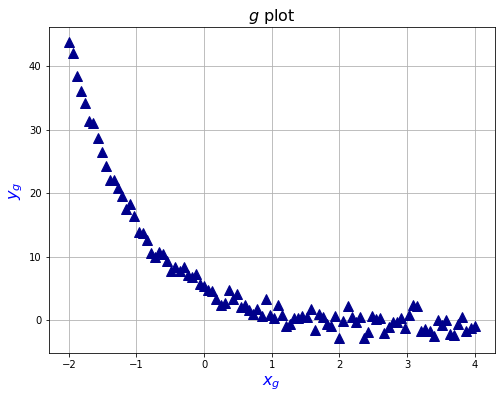

In [70]:
plt.figure(figsize=(8,6))
plt.plot(x_g,y_g,'^',markersize=10, color='darkblue')
plt.title('$g$ plot', size=16)
plt.xlabel('$x_g$', size=16, color='blue')
plt.ylabel('$y_g$', size=16, color='blue')
plt.grid()
#plt.legend(fontsize=13)

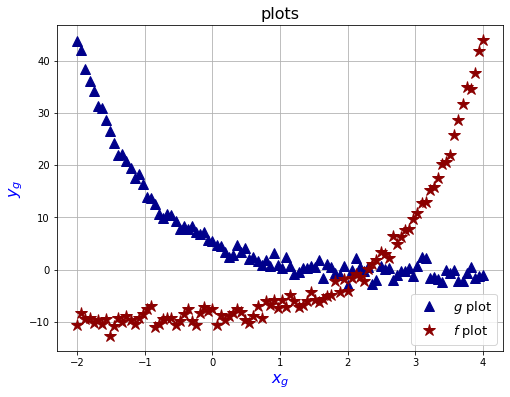

In [74]:
plt.figure(figsize=(8,6))
plt.plot(x_g,y_g,'^',markersize=10, color='darkblue', label='$g$ plot')
plt.plot(x_f,y_f,'*',markersize=12, color='darkred', label='$f$ plot')
plt.title('plots', size=16)
plt.xlabel('$x_g$', size=16, color='blue')
plt.ylabel('$y_g$', size=16, color='blue')
plt.grid()
plt.legend(fontsize=13)

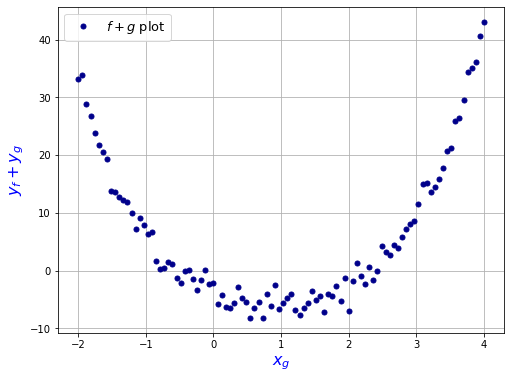

In [77]:
#Ahora la suma
plt.figure(figsize=(8,6))
plt.plot(x_g,y_g+y_f,'.',markersize=10, color='darkblue', label='$f+g$ plot')
#plt.title('plots', size=16)
plt.xlabel('$x_g$', size=16, color='blue')
plt.ylabel('$y_f+y_g$', size=16, color='blue')
plt.grid()
plt.legend(fontsize=13)

In [81]:
#este es el conjunto que vamos a ajustar, la suma de ambas Y
curva=np.array(y_f+y_g)

In [83]:
#Vamos a usar cruvefit para el ajuste
#Una vez que se tiene el dataset que se quiere ajustar (curva), es necesario definir la función y sus parámetros libres
def f(t, a, b, c):
    return a*t**2 + b*t + c



In [91]:
#Ahora hacemos el ajuste, curve_fit regresa varias salidas, una es el arreglo de parámetros que ajsutan mejor la función
#el segundo es la matriz de covarianza:

params, cov = curve_fit(f,xdata=x_f,ydata=curva)

In [93]:
#Así, los parámetro que mejor ajustan la curva son
params

array([ 4.55037324, -7.95814613, -4.55137109])

In [94]:
a,b,c=params

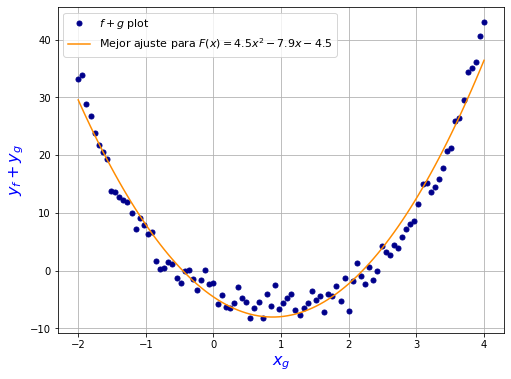

In [99]:
#Ahora la suma
plt.figure(figsize=(8,6))
plt.plot(x_g,curva,'.',markersize=10, color='darkblue', label='$f+g$ plot')
plt.plot(x_g,f(x_g,a,b,c),color='darkorange',label='Mejor ajuste para $F(x)=4.5x^2 - 7.9x - 4.5$')
plt.xlabel('$x_g$', size=16, color='blue')
plt.ylabel('$y_f+y_g$', size=16, color='blue')
plt.grid()
plt.legend(fontsize=11)

Text(33.0, 0.5, '$\\sigma_j$ con $i=x,y,z$')

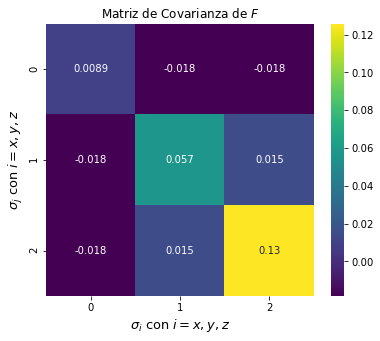

In [121]:
#Ahora graficamos la matriz de covarianza
plt.figure(figsize=(6,5))

#heatmap hace esta dist de densidades de un arreglo dado, en este caso la matriz de cov:
plt.title('Matriz de Covarianza de $F$')
sns.heatmap(cov, annot=True, cmap="viridis")
plt.xlabel('$\sigma_i$ con $i=x,y,z$', size=13)
plt.ylabel('$\sigma_j$ con $i=x,y,z$', size=13)

#normalmente el orden de la matriz es al revés, pero hay que invertir el orden del eje y, de 0 a 2...

# Ahora vamos a hacer una interpolación del mejor ajuste:

In [130]:
def F(t):
    return 4.5*t**2 - 7.9*t -4.5

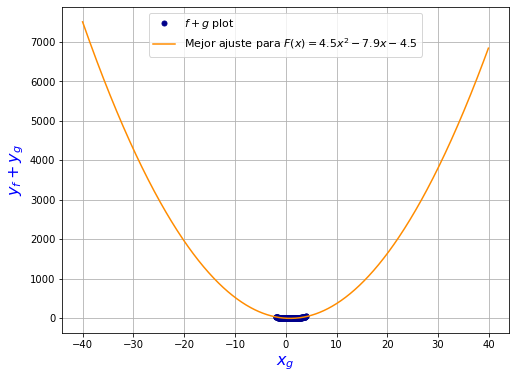

In [132]:
x=np.arange(-40,40,0.1)
plt.figure(figsize=(8,6))
plt.plot(x_g,curva,'.',markersize=10, color='darkblue', label='$f+g$ plot')
plt.plot(x,F(x),color='darkorange',label='Mejor ajuste para $F(x)=4.5x^2 - 7.9x - 4.5$')
plt.xlabel('$x_g$', size=16, color='blue')
plt.ylabel('$y_f+y_g$', size=16, color='blue')
plt.grid()
plt.legend(fontsize=11)

# Mínimo de la función

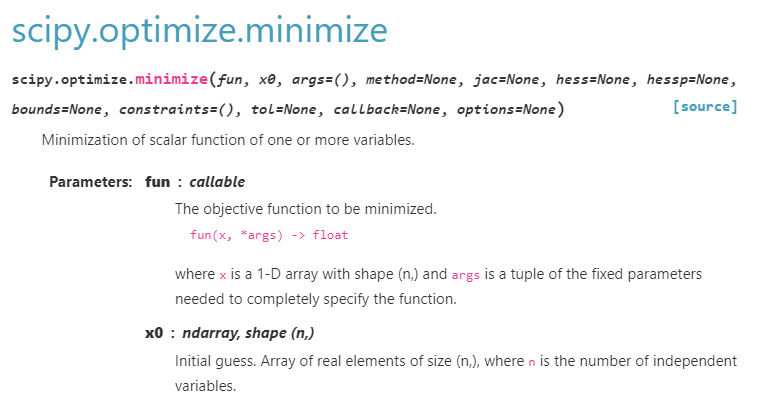

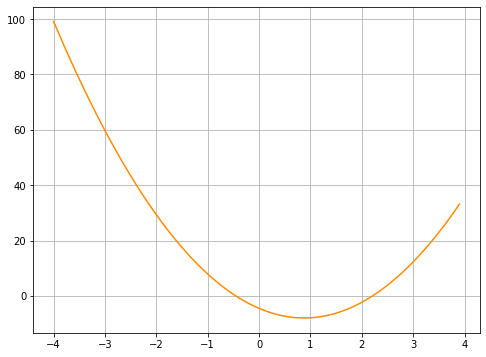

In [135]:
x=np.arange(-4,4,0.1)
plt.figure(figsize=(8,6))
plt.plot(x,F(x),color='darkorange')
plt.grid()

In [140]:
#El minimo está cerca de 1, entonces vamos a usar un valor inicial cercano a ese
F_min=minimize(F,0.5)
F_min

      fun: -7.967222222222222
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.87777778])

# Raíces de la función

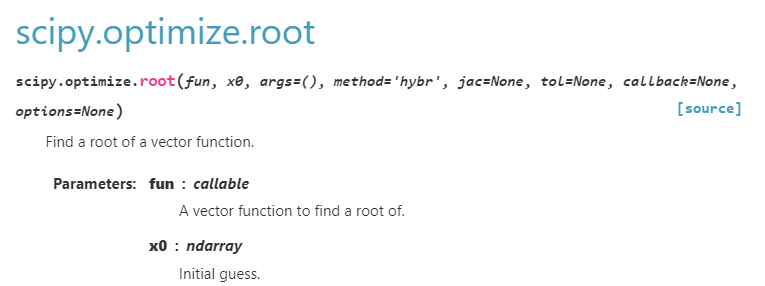

In [145]:
r1=root(F, 2)['x']
r1

array([2.20837683])

In [146]:
r2=root(F, -1)['x']
r2

array([-0.45282127])

# Ahora graficamos las tangentes en las raíces de la función

Tenemos un punto por el que pasa la recta y su pendiente (la derivada de la función evaluada en ese punto)
$$y=F'(x_0)(x-x_0) + y_0$$

la derivada la podemos encontrar con 
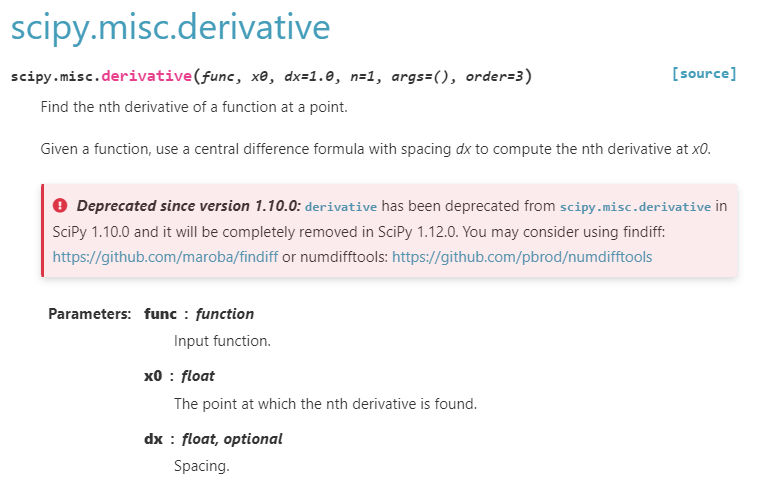

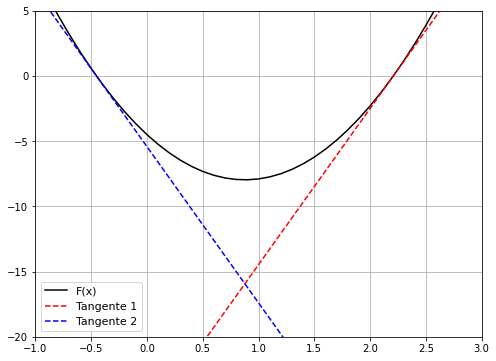

In [168]:
m1=derivative(F,r1) 
m2=derivative(F,r2)

x=np.arange(-1.8,4,0.1)
plt.figure(figsize=(8,6))
plt.plot(x,F(x),color='k',label='F(x)')
plt.plot(x,m1*(x-r1)+F(r1),'--r', label='Tangente 1') #T1
plt.plot(x,m2*(x-r2)+F(r2),'--b', label='Tangente 2') #T2
plt.xlim(-1,3)
plt.ylim(-20,5)


#plt.xlabel('$x_g$', size=16, color='blue')
#plt.ylabel('$y_f+y_g$', size=16, color='blue')

plt.grid()
plt.legend(fontsize=11)

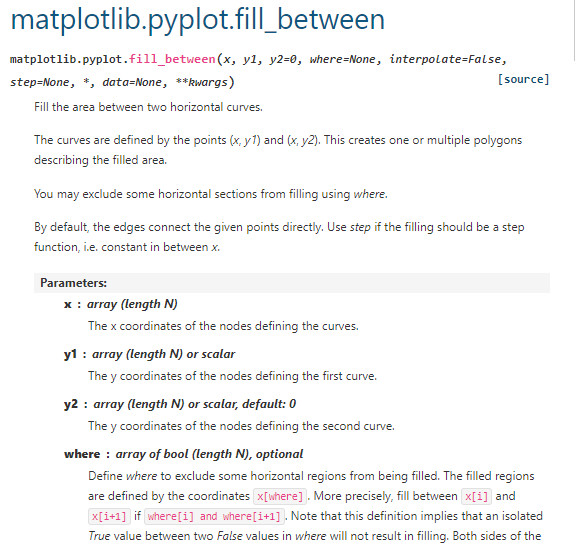

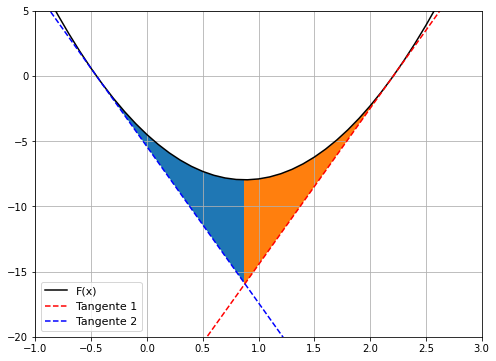

In [182]:
plt.figure(figsize=(8,6))
plt.plot(x,F(x),color='k',label='F(x)')
plt.plot(x,m1*(x-r1)+F(r1),'--r', label='Tangente 1') #T1
plt.plot(x,m2*(x-r2)+F(r2),'--b', label='Tangente 2') #T2
plt.xlim(-1,3)
plt.ylim(-20,5)

#Vamos a rellenar entre la raíz y el mínimo
x1=np.linspace(-0.45,0.87,40)
#y el mínimo y la otra raíz
x2=np.linspace(0.87,2.20,40)

plt.fill_between(x1,y1=m2*(x1-r2)+F(r2),y2=F(x1))
plt.fill_between(x2,y1=m1*(x2-r1)+F(r1),y2=F(x2))

#plt.xlabel('$x_g$', size=16, color='blue')
#plt.ylabel('$y_f+y_g$', size=16, color='blue')

plt.grid()
plt.legend(fontsize=11)

In [186]:
x=Symbol('x')
f=4.55*x**2-7.958*x-4.551

ac1=(9.1*(-0.45401987)-7.958)*(x+0.45401987)+4.55*(-0.45401987)**2-7.958*(-0.45401987)-4.551
ac2=(9.1*(2.20303086)-7.958)*(x-2.20303086)+4.55*(2.20303086)**2-7.958*(2.20303086)-4.551

a1=integrate(f,(x,-0.45401987,2.20303086))
a2=integrate(ac1,(x,-0.45401987,0.874505494505495))
a3=integrate(ac2,(x,0.874505494505495,2.20303086))

print('El área total es:',a1-a2-a3,'unidades cuadradas')

El área total es: 7.11262135731687 unidades cuadradas
